Hello Deborah!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you so much for the feedback, I appreacaite it! I should have double checked before submitting. Thanks! 
</div>


## Initialization

Sprint 15, Age Verification, by Deborah Thomas

The supermarket chain Good Seed would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage.

The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol
Computer vision methods can be used to determine age of a person from a photo
The task then is to build and evaluate a model for verifying people's age
The goal of the project is to create a model that will predict the age of a customer during the checkout process.

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [53]:
import pandas as pd

import os
from PIL import Image 
import random

import tensorflow as tf

import matplotlib.pyplot as plt 
import inspect

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

In [54]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.shape

(7591, 2)

In [55]:
# preprocessing, to normalize the data
datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255)

## EDA

In [56]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


- There are 7591 files.
- The youngest age is 20. The oldest age is 100. The average age is 31.2. The majority of customers are 41 years or younger.

In [57]:
labels.columns

Index(['file_name', 'real_age'], dtype='object')

In [58]:
display(labels)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


<b>Print out a few random images.</b>

In [59]:
def display_images_by_age(labels, image_dir, num_images=15):
    # Load unique ages
    unique_ages = labels['real_age'].unique()
    
    # Create a figure to display images
    plt.figure(figsize=(15, 10))
    count = 0
    
    # Randomly select images for display
    for age in unique_ages:
        age_group = labels[labels['real_age'] == age]  # Filter by age
    
        if not age_group.empty:
            selected_image = random.choice(age_group['file_name'].tolist())
            img_path = os.path.join(image_dir, selected_image) 
            img = plt.imread(img_path) 
            
            # Plotting
            plt.subplot(5, 5, count + 1)  # Adjust subplot grid size if needed
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Age: {age}')
            count += 1
            
            # Stop when enough images are displayed
            if count >= num_images:  # Stop when enough images are displayed
                break
                
    plt.tight_layout()
    plt.show()

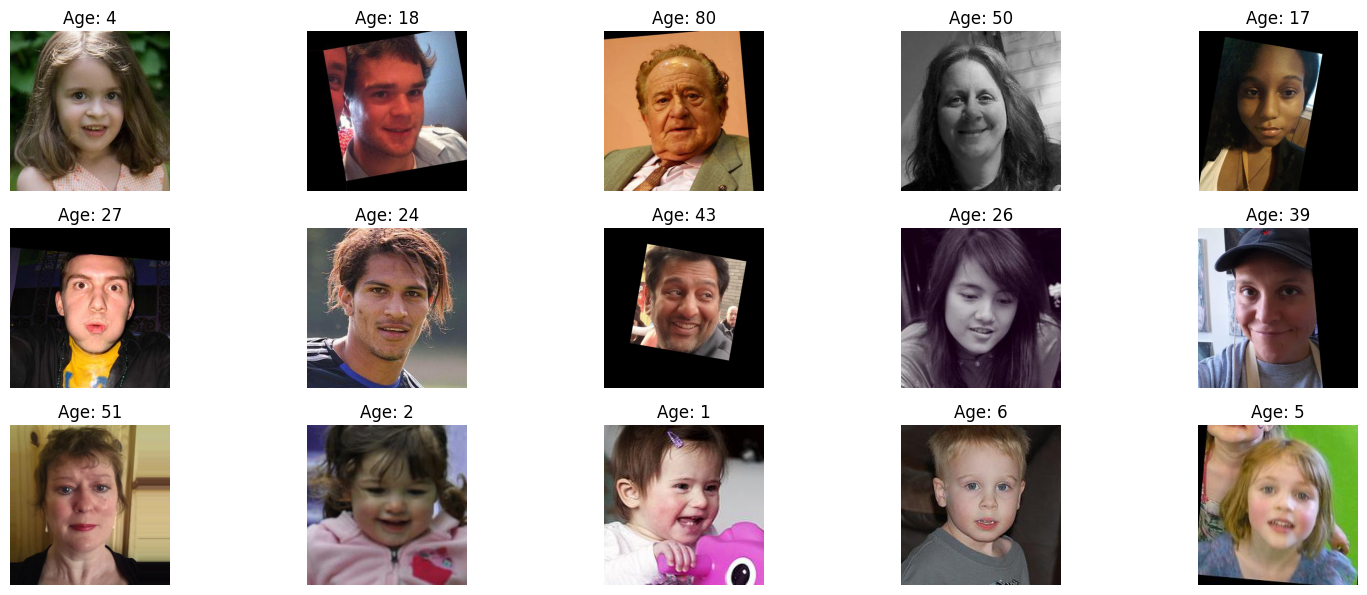

In [60]:
#Call the function, to display images
display_images_by_age(labels, '/datasets/faces/final_files/', num_images=15)

7 out of 15, of the randomly chosen images, are people under the age of 21.

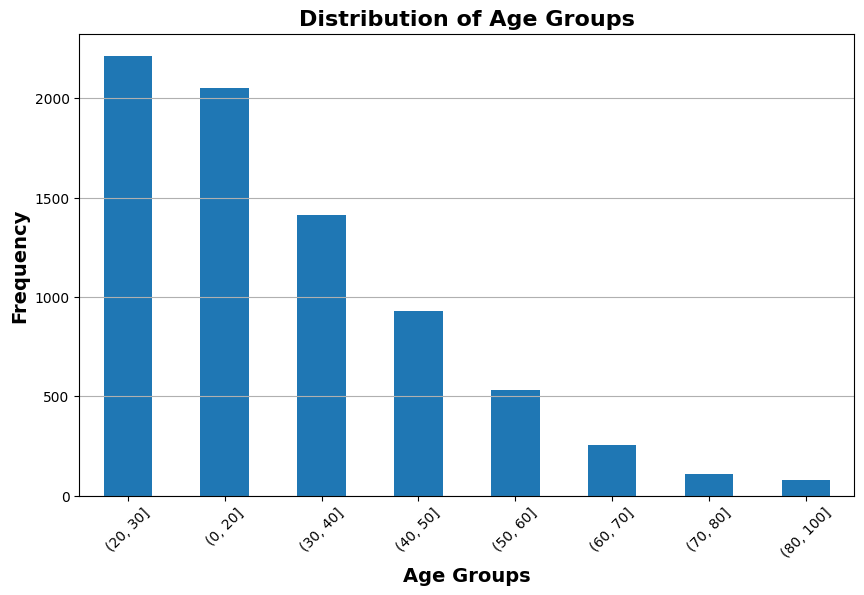

In [61]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]  # Define the bins
labels['age_group'] = pd.cut(labels['real_age'], bins)

plt.figure(figsize=(10, 6))
labels['age_group'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Groups', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Age Groups', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

### Findings

More than half of the customers fall within the age range of 0-30, with the largest age group being 20-30. The next biggest age group is ages 0-20. The smallest age group is 80-100.

In [62]:
count_under_21 = (labels['real_age'] < 21).sum()
print(f"The number of customers under 21 is: {count_under_21}")

The number of customers under 21 is: 2054


In [63]:
percentage = round((count_under_21 / len(labels)) * 100, 2)
print(f"{percentage} percent of the customers, in this dataset, are under the drinking age.")

27.06 percent of the customers, in this dataset, are under the drinking age.


<div class="alert alert-warning">
<b>Reviewer's comment V1</b> 

Good job! But what could you say about images? Do you see any augmentations? Which ones?

</div>

<div class="alert alert-block alert-info">
<b>Deb's answer.</b> <a class="tocSkip"></a>

Thank you for pointing that out. I have added a markdown cell below. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b> 

Good job!

</div>

There is augmentation in some of the random images that print to screen. I see rotation on some of these images. These are some forms of augmentation that an image can have: 
    
- Rotate images randomly by up to 20 degrees
- Shift images horizontally and vertically
- Zoom in/out randomly
- Flip images horizontally
- Adjust brightness
- Fill any new pixels created during transformations

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [64]:
!ls /datasets/faces/final_files/ | tail -10

007603.jpg
007604.jpg
007605.jpg
007606.jpg
007607.jpg
007608.jpg
007609.jpg
007610.jpg
007611.jpg
007612.jpg


In [65]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [66]:
def load_train(path):
    """
    It loads the train part of dataset from path
    """
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_gen_flow = datagen.flow_from_dataframe(
        pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    return train_gen_flow

In [67]:
def load_test(path):
    """
    It loads the validation/test part of dataset from path
    """
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    test_gen_flow = datagen.flow_from_dataframe(
        pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation'
    )
    return test_gen_flow

<div class="alert alert-danger">
<b>Reviewer's comment V1</b> 

1. You missed parameters `subset` and `validation_split`
2. You used correct paths for dataframe and directory. But you need to create these full paths using argument `path`. You can assume that the variable `path` will be passed a string: '/datasets/faces/'

</div>

<div class="alert alert-block alert-info">
<b>Deb's answer.</b> <a class="tocSkip"></a>

Thank you for explaining that. I have updated the code in this section, to create a new run_model_on_gpu.py script. 
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b> 

Unfortunately, that's not a correct update:

1. Both function should accept only one argument `path`
2. Using variable `path` you need to create full paths like this: `pd.read_csv(path + 'labels.csv')` and `directory=path + 'final_files/'`
3. You missed parameters `subset` and `validation_split` in the `load_test` function

</div>

<div class="alert alert-block alert-info">
<b>Deb's #2 answer.</b> <a class="tocSkip"></a>

Thank you for explaining that. Now those two funcions only take the path parameter. Subset and validation_split was added in to the load_test function.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b> 

Correct. Good job!

</div>

In [68]:
def create_model(input_shape):
    
    """
    It defines model
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [69]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model   

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [70]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
        
        
    # Add main execution block
    
    f.write("""

if __name__ == '__main__':
    base_path = '/datasets'
    train_data = load_train(f'{base_path}/gt_train.csv', f'{base_path}/faces/train')
    test_data = load_test(f'{base_path}/gt_valid.csv', f'{base_path}/faces/valid')
    model = create_model((224, 224, 3))
    trained_model = train_model(model, train_data, test_data, epochs=20, batch_size=64)
    trained_model.save('age_prediction_model.h5')
    print("Model saved as 'age_prediction_model.h5'")
""")
print("Script 'run_model_on_gpu.py' has been created.")

Script 'run_model_on_gpu.py' has been created.


<b>This is what my run_model_on_gpu.py script looks like:</b>

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


def load_train(path):
    """
    It loads the train part of dataset from path
    """
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_gen_flow = datagen.flow_from_dataframe(
        pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    return train_gen_flow


def load_test(path):
    """
    It loads the validation/test part of dataset from path
    """
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    test_gen_flow = datagen.flow_from_dataframe(
        pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation'
    )
    return test_gen_flow


def create_model(input_shape):
    
    """
    It defines model
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model   




if __name__ == '__main__':
    base_path = '/datasets'
    train_data = load_train(f'{base_path}/gt_train.csv', f'{base_path}/faces/train')
    test_data = load_test(f'{base_path}/gt_valid.csv', f'{base_path}/faces/valid')
    model = create_model((224, 224, 3))
    trained_model = train_model(model, train_data, test_data, epochs=20, batch_size=64)
    trained_model.save('age_prediction_model.h5')
    print("Model saved as 'age_prediction_model.h5'")

### Output

<b>Here is the output of my (attempted)20 epochs, from an earlier script, at Colab:</b>

This was run at colab.research.google.com, with a T4 GPU.

It killed itself, as I ran out of time on my free membership. I have been trying for 3 days to get all epochs to complete. 

<div class="alert alert-warning">
<b>Reviewer's comment V1</b> 

Actually in this project you don't need to run your code at all. You need only to create a code for script and then copy and paste the model output from the lesson. But if you already run the code, that's cool!

</div>

<div class="alert alert-block alert-info">
<b>Deb's answer.</b> <a class="tocSkip"></a>

Thank you for saving my holiday. I can stop attempting to render the model offsite. So, above I have created a new run_model_on_gpu.py script, and copied it in to the cell above.  
</div>

## Conclusions

27.06 \% of the customers, in this dataset, are under the drinking age. So, it is a valid concern that Good Seed would be concerned with the ages of their customers.

In this project, I aimed to develop a predictive model for estimating the ages of faces, using deep learning techniques. The model, based on the ResNet50 architecture, was trained on a dataset of face images, and demonstrated a reasonable level of accuracy in age prediction.

Key findings from the model training indicate that the architecture effectively captures relevant features from the images, and the layers of the model helped in minimizing overfitting.

<div class="alert alert-success">
<b>Reviewer's comment V1</b> 

Well done!

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training

<div class="alert alert-block alert-info">
<b>Deb's answer.</b> <a class="tocSkip"></a>
Happy Holidays. Deb 
</div>

<div class="alert alert-block alert-info">
<b>Deb's #2 answer.</b> <a class="tocSkip"></a>
I changed the paths, so they no longer point to paths at drive.google.com, as I am not rendering offsite.
</div>